#### We will be looking at constraint based estimator and hill climb search for structure learning

In [1]:
import pandas as pd
import numpy as np
from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators import HillClimbSearch, BicScore
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# lets generate random data with 4 variables A, B, C, D
data = pd.DataFrame(np.random.randint(0, 5, size=(2500, 4)), columns=list('ABCD'))

In [3]:
# lets add some ralationship to the variables as following
data['AC'] = data[["A", "C"]].product(axis=1)
data['BD'] = data[["B", "D"]].product(axis=1)
data

,A,B,C,D,AC,BD
0,2,3,3,1,6,3
1,0,3,3,0,0,0
2,4,4,1,0,4,0
3,4,2,3,1,12,2
4,0,0,1,3,0,0
5,0,3,1,0,0,0
6,2,0,3,4,6,0
7,0,0,2,4,0,0
8,4,2,3,2,12,4
9,1,3,0,2,0,6


In [4]:
#Estimate Bayesian Network structure
est = ConstraintBasedEstimator(data)
model = est.estimate()
print("Resulting network: ", model.edges())

Resulting network:  [('A', 'AC'), ('B', 'BD'), ('C', 'AC'), ('D', 'BD')]


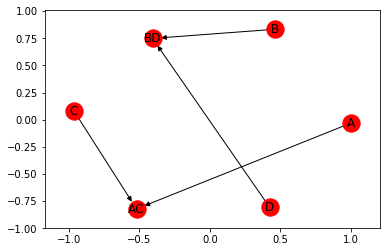

In [5]:
nx.draw_networkx(model)
plt.show()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


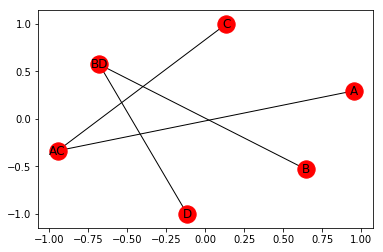

In [6]:
# We can also estimate the structure as follows
skel, _ = est.estimate_skeleton()
nx.draw_networkx(skel)

In [7]:
# lets add another relation in the data
data = pd.DataFrame(np.random.randint(0, 5, size=(5000, 4)), columns=list('ABCD'))
data['AC'] = data[["A", "C"]].product(axis=1)
data['BD'] = data[["B", "D"]].product(axis=1)
data['ABCD'] = data[["A", "B", "C", "D"]].product(axis=1)
data

,A,B,C,D,AC,BD,ABCD
0,2,3,3,2,6,6,36
1,3,2,3,3,9,6,54
2,1,3,4,4,4,12,48
3,3,3,2,1,6,3,18
4,4,0,4,0,16,0,0
5,2,1,3,1,6,1,6
6,2,4,1,3,2,12,24
7,1,1,2,3,2,3,6
8,2,4,1,1,2,4,8
9,3,2,2,3,6,6,36


/opt/conda/lib/python3.6/site-packages/pgmpy/estimators/base.py:215: UserWarning: Insufficient data for testing AC _|_ ABCD | ['A']. At least 5625 samples recommended, 5000 present.
  "At least {0} samples recommended, {1} present.".format(5 * num_params, len(self.data)))
/opt/conda/lib/python3.6/site-packages/pgmpy/estimators/base.py:215: UserWarning: Insufficient data for testing AC _|_ ABCD | ['C']. At least 5625 samples recommended, 5000 present.
  "At least {0} samples recommended, {1} present.".format(5 * num_params, len(self.data)))
/opt/conda/lib/python3.6/site-packages/pgmpy/estimators/base.py:215: UserWarning: Insufficient data for testing BD _|_ ABCD | ['B']. At least 5625 samples recommended, 5000 present.
  "At least {0} samples recommended, {1} present.".format(5 * num_params, len(self.data)))
/opt/conda/lib/python3.6/site-packages/pgmpy/estimators/base.py:215: UserWarning: Insufficient data for testing BD _|_ ABCD | ['D']. At least 5625 samples recommended, 5000 present.

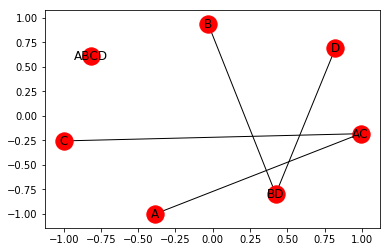

In [8]:
# lets estimate the structure
est = ConstraintBasedEstimator(data)
skel, _ = est.estimate_skeleton()
nx.draw_networkx(skel)

#### You could see it could not capture the structure well based on the data provided. You can change the number of samples and see if it does a better job. 
#### Now lets look at hill climb search.

In [9]:
# lets estimate structure using hill climb using bic score criterion
est = HillClimbSearch(data, scoring_method=BicScore(data))
model = est.estimate()
model.edges()

OutEdgeView([('A', 'AC'), ('B', 'BD'), ('C', 'AC'), ('D', 'BD'), ('AC', 'ABCD'), ('ABCD', 'B'), ('ABCD', 'D')])

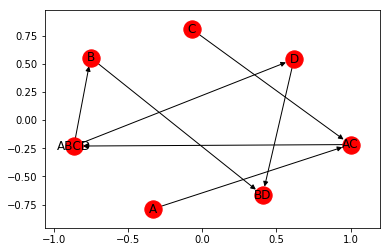

In [10]:
nx.draw_networkx(model)

In [11]:
model.get_independencies()

(A _|_ C)
(A _|_ BD, B, D, ABCD | AC)
(A _|_ BD, B, D | ABCD)
(A _|_ BD, B, D, ABCD | AC, C)
(A _|_ BD, B, D | ABCD, C)
(A _|_ BD | B, D)
(A _|_ BD, D, ABCD | B, AC)
(A _|_ BD, D | B, ABCD)
(A _|_ BD, B, ABCD | AC, D)
(A _|_ BD, B | D, ABCD)
(A _|_ B, D, ABCD | BD, AC)
(A _|_ B, D | BD, ABCD)
(A _|_ BD, B, D | AC, ABCD)
(A _|_ BD | B, D, C)
(A _|_ BD, D, ABCD | B, AC, C)
(A _|_ BD, D | ABCD, B, C)
(A _|_ BD, B, ABCD | AC, D, C)
(A _|_ BD, B | ABCD, D, C)
(A _|_ B, D, ABCD | BD, AC, C)
(A _|_ B, D | ABCD, BD, C)
(A _|_ BD, B, D | ABCD, AC, C)
(A _|_ BD, ABCD | B, AC, D)
(A _|_ BD | B, D, ABCD)
(A _|_ D, ABCD | BD, B, AC)
(A _|_ D | BD, B, ABCD)
(A _|_ BD, D | B, AC, ABCD)
(A _|_ B, ABCD | BD, AC, D)
(A _|_ B | BD, D, ABCD)
(A _|_ BD, B | AC, D, ABCD)
(A _|_ B, D | BD, AC, ABCD)
(A _|_ BD, ABCD | B, AC, D, C)
(A _|_ BD | ABCD, B, D, C)
(A _|_ D, ABCD | BD, B, AC, C)
(A _|_ D | ABCD, BD, B, C)
(A _|_ BD, D | ABCD, B, AC, C)
(A _|_ B, ABCD | BD, AC, D, C)
(A _|_ B | ABCD, BD, D, C)
(A _|_ 